# WEEK01_Mission_Upgrad_code

* 미션 데이터셋 소개

    * [Kaggle 데이터셋](https://www.kaggle.com/blastchar/telco-customer-churn)은 통신사 고객 이탈(Churn)에 대한 정보를 담고 있습니다. IBM에서 제공한 이 데이터셋은 고객 유지에 필요한 행동을 예측하는 데 사용될 수 있으며, 고객 데이터를 분석하여 고객 유지 프로그램을 개발하는 데 도움이 됩니다.
    * 해당 데이터셋은 다음의 정보로 구성되어 있습니다.
        * 고객 인구 통계 정보(Demographic info): 고객의 성별, 연령대, 배우자 및 부양 가족의 유무(Gender, SeniorCitizen, Partner, Dependents) 등에 관한 정보가 포함되어 있습니다.
        * 고객 이탈(Churn) 정보: 서비스를 중단 여부에 대한 정보가 포함되어 있습니다.
        * 서비스 가입 정보(Services subscribed): 고객들이 가입한 서비스들, 예를 들어 전화, 다중 라인, 인터넷, 온라인 보안, 온라인 백업, 장치 보호, 기술 지원, 스트리밍 TV 및 영화( honeService, MultipleLine, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies) 등에 대한 정보가 있습니다.
        * 고객 계정 정보(Customer account info): 고객이 얼마나 오래 서비스를 이용했는지, 계약 유형, 결제 방법, 무페이퍼 청구 여부, 월별 요금, 총 요금 (CustomerID, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Tenure)등의 정보가 담겨 있습니다.

* 해당 미션으로 시도해 볼 수 있는 현실 세계 문제
    * 이탈 예측 모델링: 가장 일반적인 사용 사례로, 고객의 이탈 가능성을 예측하는 모델을 구축합니다. 이러한 모델은 고객의 과거 데이터와 행동 패턴을 분석하여 누가 이탈할 가능성이 높은지 예측합니다.

    * 고객 세분화: 고객을 다양한 그룹으로 세분화하여, 특정 그룹이 왜 더 높은 이탈률을 보이는지 이해할 수 있습니다. 이를 통해 타겟 마케팅 전략을 개발하거나 특정 고객 그룹에 더 맞춤화된 서비스를 제공할 수 있습니다.

    * 원인 분석: 머신러닝 모델을 사용하여 고객 이탈의 주요 원인을 파악할 수 있습니다. 예를 들어, 서비스 품질, 가격, 고객 서비스 경험 등 다양한 요인이 고객 이탈에 어떤 영향을 미치는지 분석할 수 있습니다. 피처의 중요도를 파악하고 어떤 요인이 이탈의 중요한 피처인지를 확인해 봅니다.

    * 추천 시스템 개선: 이탈 위험이 있는 고객에게 맞춤형 서비스나 제품을 추천하여 고객 만족도를 높이고 이탈률을 줄일 수 있습니다.

    * 고객 유지 전략 개발: 이탈 예측 모델을 활용해 고위험 고객을 식별하고, 이들을 대상으로 특별 프로모션, 개선된 고객 서비스, 맞춤형 커뮤니케이션 전략 등을 제공하여 이탈률을 줄일 수 있습니다.

    * 정책 및 서비스 개선: 모델에서 도출된 인사이트를 바탕으로 비즈니스 정책, 제품, 서비스를 개선하여 전반적인 고객 경험을 향상시킬 수 있습니다.

## 데이터 준비

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# 데이터 로드
df = pd.read_csv("https://bit.ly/telco-csv", index_col="customerID")
df.shape

(7043, 20)

In [ ]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

## 데이터 전처리

In [ ]:
# 정답데이터 정리
df["TotalCharges"] = df["TotalCharges"].str.strip().replace("", np.nan).astype(float)

#### 결측치 처리

In [ ]:
# 결측치 확인
df[df["TotalCharges"].isnull()==True]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No


In [ ]:
null_list = df[df["TotalCharges"].isnull()==True].index.tolist()
null_list

['4472-LVYGI',
 '3115-CZMZD',
 '5709-LVOEQ',
 '4367-NUYAO',
 '1371-DWPAZ',
 '7644-OMVMY',
 '3213-VVOLG',
 '2520-SGTTA',
 '2923-ARZLG',
 '4075-WKNIU',
 '2775-SEFEE']

In [ ]:
# 평균값으로 결측치 채우기
mean = df["TotalCharges"].mean()
df["TotalCharges"].loc[null_list] = mean
df["TotalCharges"].loc[null_list]

customerID
4472-LVYGI    2283.300441
3115-CZMZD    2283.300441
5709-LVOEQ    2283.300441
4367-NUYAO    2283.300441
1371-DWPAZ    2283.300441
7644-OMVMY    2283.300441
3213-VVOLG    2283.300441
2520-SGTTA    2283.300441
2923-ARZLG    2283.300441
4075-WKNIU    2283.300441
2775-SEFEE    2283.300441
Name: TotalCharges, dtype: float64

In [ ]:
df[df["TotalCharges"].isnull()==True]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,


#### 원-핫 인코딩

In [ ]:
# 이진분류가 가능한 특성 추출
nuniq = df.nunique()
bi_cols = nuniq[nuniq == 2].index
bi_cols

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'PaperlessBilling', 'Churn'],
      dtype='object')

In [ ]:
# 이진분류가 가능한 변수들만 원-핫 인코딩
df["gender_encode"] = (df["gender"] == "Male").astype(int)
df["Partner_encode"] = (df["Partner"] == "Yes").astype(int)
df["Dependents_encode"] = (df["Dependents"] == "Yes").astype(int)
df["PhoneService_encode"] = (df["PhoneService"] == "Yes").astype(int)
df["PaperlessBilling_encode"] = (df["PaperlessBilling"] == "Yes").astype(int)

In [ ]:
df.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [ ]:
mul_cols = nuniq[nuniq > 2].index
mul_cols

Index(['tenure', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges'],
      dtype='object')

In [ ]:
mul_list = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
           'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

In [ ]:
nuniq

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

#### 데이터 비율 확인

In [ ]:
# 정답의 빈도수 확인
df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [ ]:
df["Churn"].value_counts(1) # 비율로 출력

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

<Axes: xlabel='Churn', ylabel='count'>

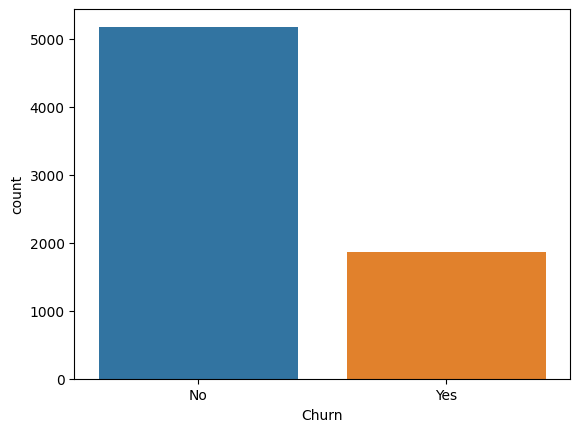

In [ ]:
sns.countplot(data=df, x="Churn")

## 데이터셋 만들기

In [ ]:
# 우선 이진데이터만 갖고서 학습
feature_names = df.select_dtypes(include="number").columns
label_name = "Churn"

print(feature_names)
print(label_name)

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_encode', 'Partner_encode', 'Dependents_encode',
       'PhoneService_encode', 'PaperlessBilling_encode'],
      dtype='object')
Churn


In [ ]:
X = df[feature_names]
y = df[label_name]

X.shape, y.shape

((7043, 9), (7043,))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5634, 9), (1409, 9), (5634,), (1409,))

## 모델 학습

DecisionTreeClassifier 파라미터 \

- min_samples_split	- 노드를 분할하기 위한 최소한의 샘플 데이터수 → 과적합을 제어하는데 사용
  - Default = 2 → 작게 설정할 수록 분할 노드가 많아져 과적합 가능성 증가
- min_samples_leaf	- 리프노드가 되기 위해 필요한 최소한의 샘플 데이터수
  - min_samples_split과 함께 과적합 제어 용도
  - 불균형 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 작게 설정 필요
- max_features	- 최적의 분할을 위해 고려할 최대 feature 개수
  - Default = None → 데이터 세트의 모든 피처를 사용
  - int형으로 지정 →피처 갯수 / float형으로 지정 →비중
  - sqrt 또는 auto : 전체 피처 중 √(피처개수) 만큼 선정
  - log : 전체 피처 중 log2(전체 피처 개수) 만큼 선정
- max_depth	- 트리의 최대 깊이
  - default = None → 완벽하게 클래스 값이 결정될 때 까지 분할 또는 데이터 개수가 min_samples_split보다 작아질 때까지 분할
  - 깊이가 깊어지면 과적합될 수 있으므로 적절히 제어 필요
- max_leaf_nodes	리프노드의 최대 개수

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=7,
                               min_samples_leaf=20,
                               min_samples_split=20,
                               max_features=0.9,
                               random_state=42)

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, max_features=0.9, min_samples_leaf=20,
                       min_samples_split=20, random_state=42)

In [ ]:
model.get_depth()

7

In [ ]:
y_predict = model.predict(X_test)
y_predict[:5]

array(['No', 'Yes', 'No', 'No', 'No'], dtype=object)

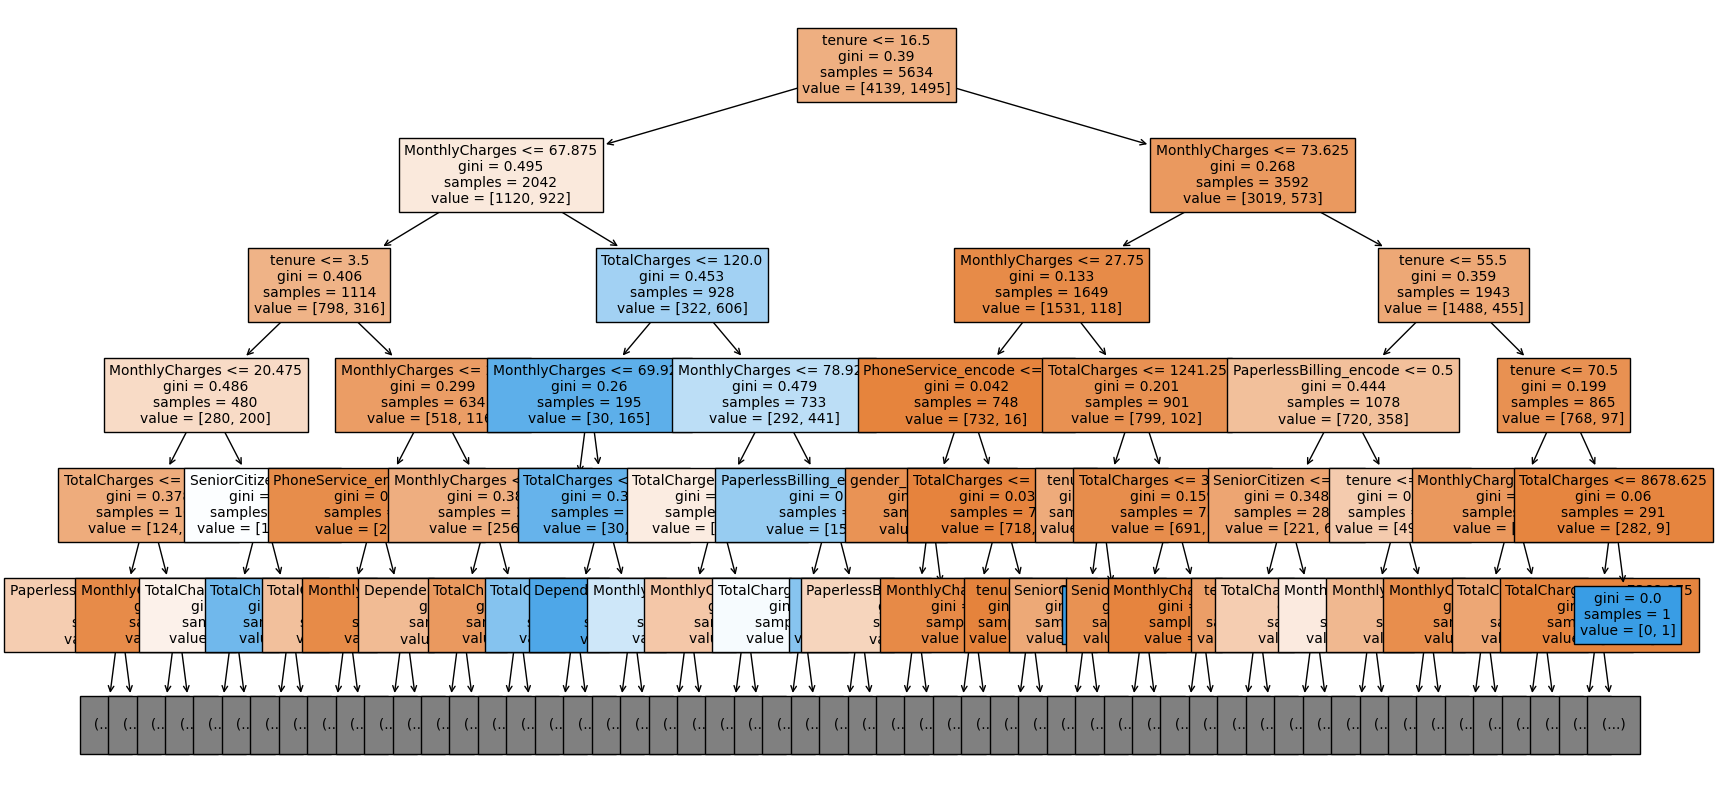

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
tree = plot_tree(model,feature_names=feature_names, filled=True, fontsize=10, max_depth=5)

<Axes: >

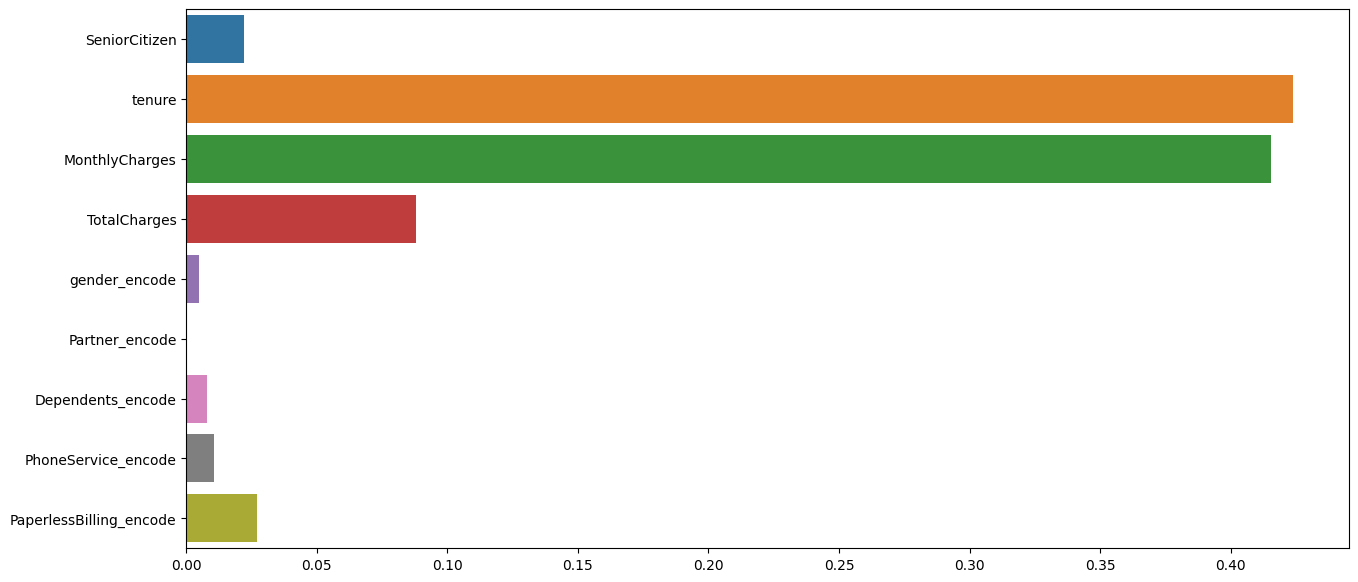

In [ ]:
plt.figure(figsize=(15, 7))
sns.barplot(x=model.feature_importances_, y=feature_names)

In [ ]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_predict)
print(f'Accuracy: {round(acc, 3)}')

Accuracy: 0.781


### 중요도 낮은 특성 제외하고 학습

In [ ]:
feature_names = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
                 'Dependents_encode', 'PhoneService_encode', 'PaperlessBilling_encode']
feature_names = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'PaperlessBilling_encode']
label_name = "Churn"

print(feature_names)
print(label_name)

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'PaperlessBilling_encode']
Churn


In [ ]:
X = df[feature_names]
y = df[label_name]

X.shape, y.shape

((7043, 5), (7043,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5634, 5), (1409, 5), (5634,), (1409,))

In [ ]:
model = DecisionTreeClassifier(max_depth=5,
                               min_samples_leaf=20,
                               min_samples_split=20,
                               max_features=0.9,
                               random_state=42)

model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_features=0.9, min_samples_leaf=20,
                       min_samples_split=20, random_state=42)

In [ ]:
y_predict = model.predict(X_test)

acc = accuracy_score(y_test, y_predict)
print(f'Accuracy: {round(acc, 3)}')

Accuracy: 0.789


<Axes: >

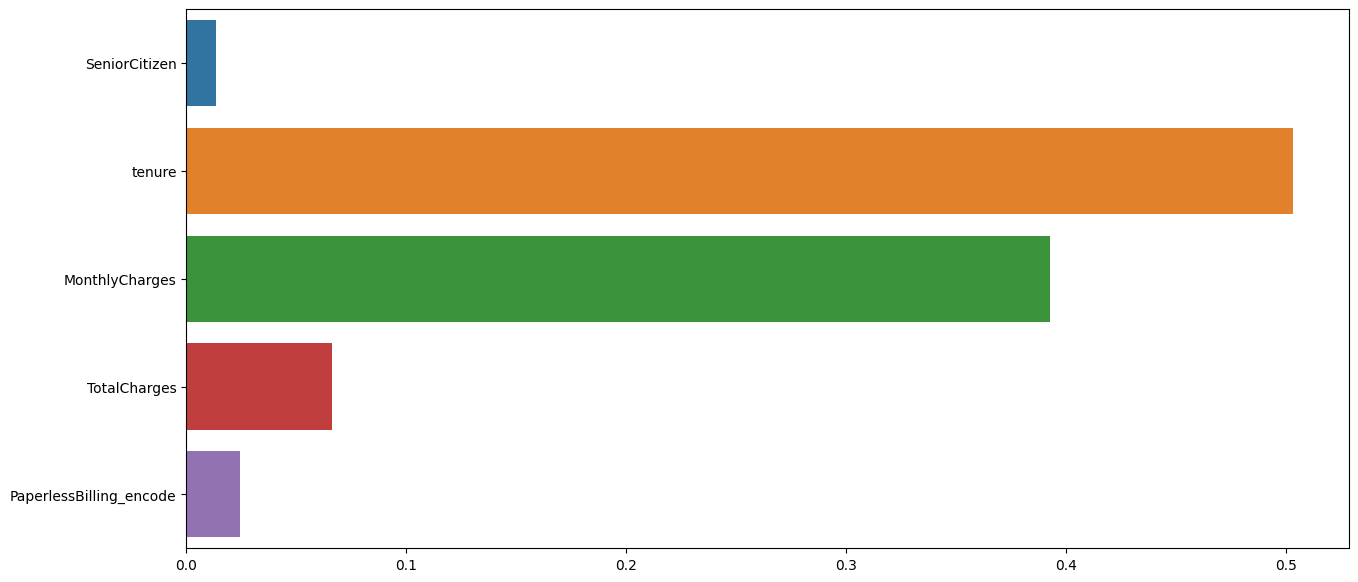

In [ ]:
plt.figure(figsize=(15, 7))
sns.barplot(x=model.feature_importances_, y=feature_names)

In [ ]:
# 정확도 78.9가 최대인 듯 하다.
# 버려진 범주형 데이터의역할이 중요할 듯 하다.